<a href="https://colab.research.google.com/github/JayanthGarikapati/project-1/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# list_attr_celeba.csv has 202599 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/gdrive/MyDrive/images/list_landmarks_align_celeba.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'list_attr_celeba.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


In [ ]:
df1.head(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [ ]:
plotPerColumnDistribution(df1,  0, 5)

<Figure size 2400x1792 with 0 Axes>

<ipython-input-5-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-5-a0343c621274>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


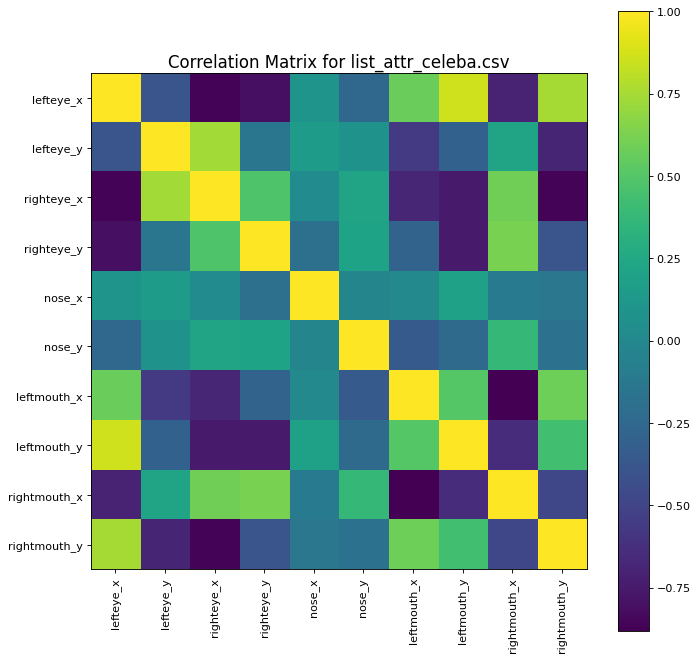

In [ ]:
plotCorrelationMatrix(df1, 10)

<ipython-input-6-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


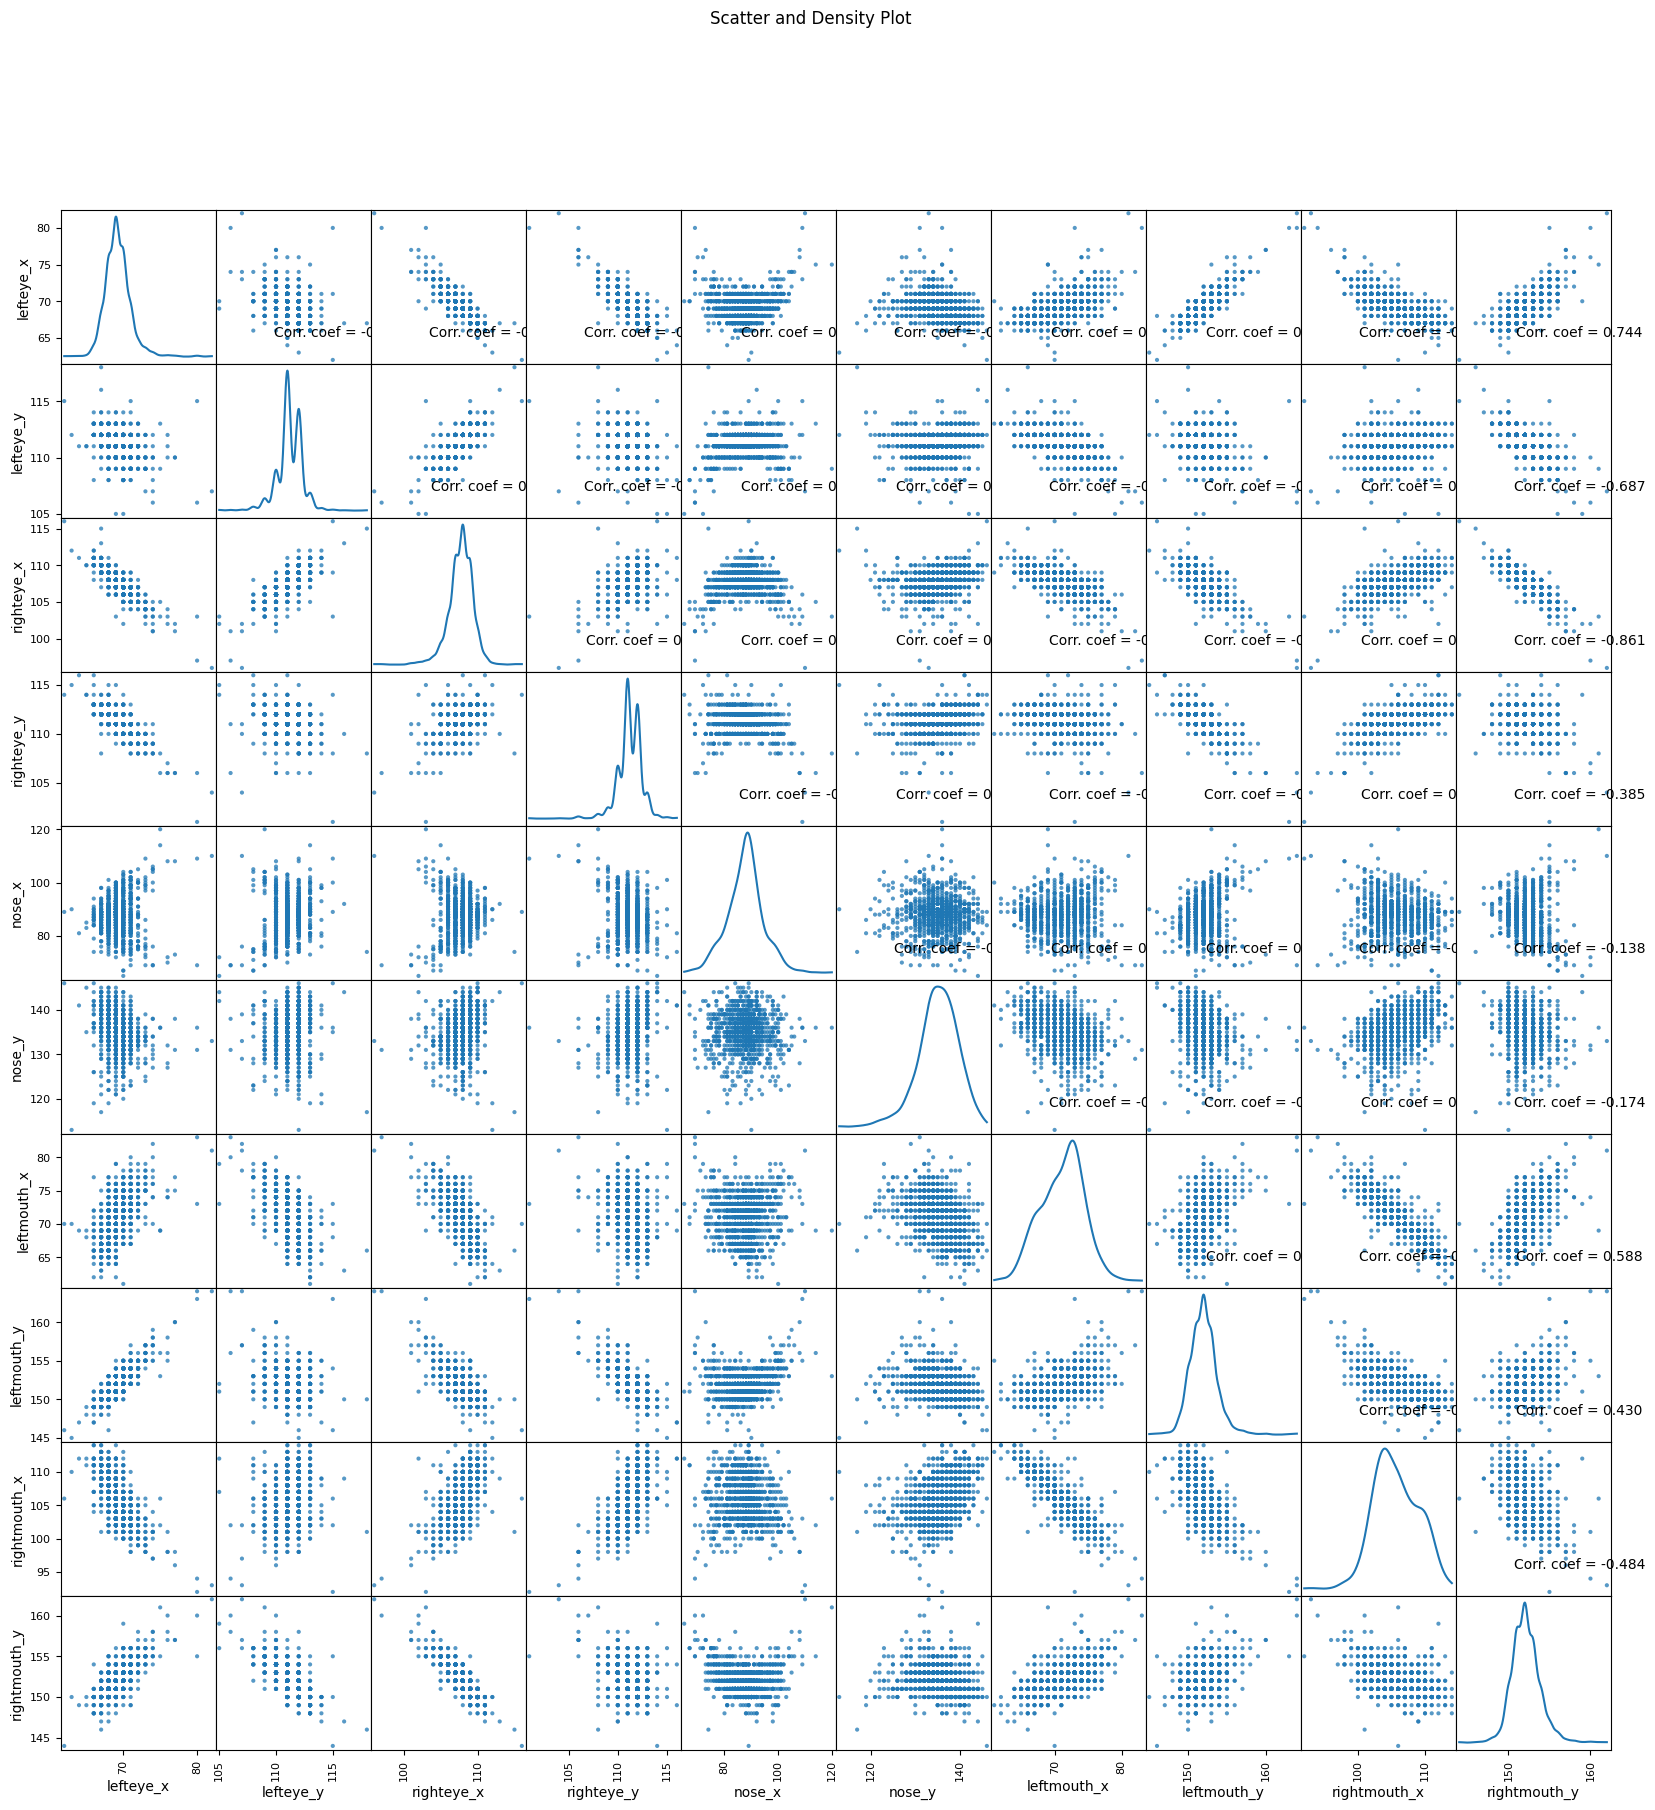

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# list_bbox_celeba.csv has 202599 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/gdrive/MyDrive/images/list_landmarks_align_celeba.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName ='/content/gdrive/MyDrive/images/list_landmarks_align_celeba.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


In [ ]:
df2.head(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [ ]:
plotPerColumnDistribution(df2, 0, 5)

<Figure size 2400x1792 with 0 Axes>

<ipython-input-5-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-5-a0343c621274>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


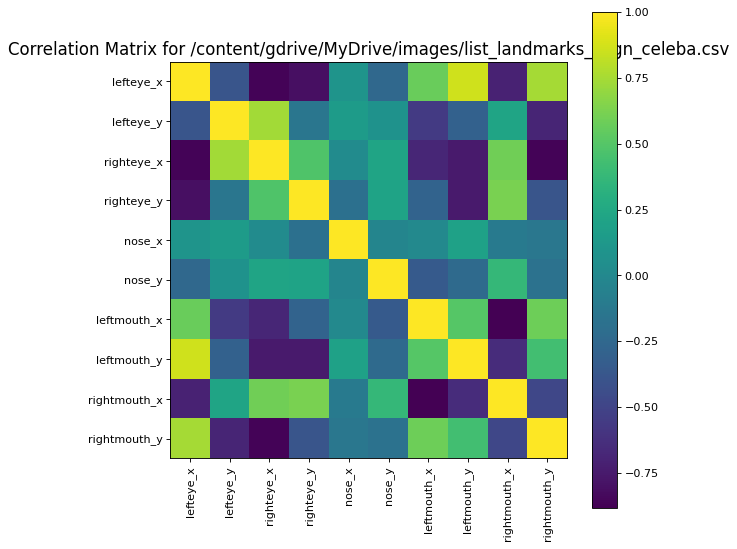

In [ ]:
plotCorrelationMatrix(df2, 8)

<ipython-input-6-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


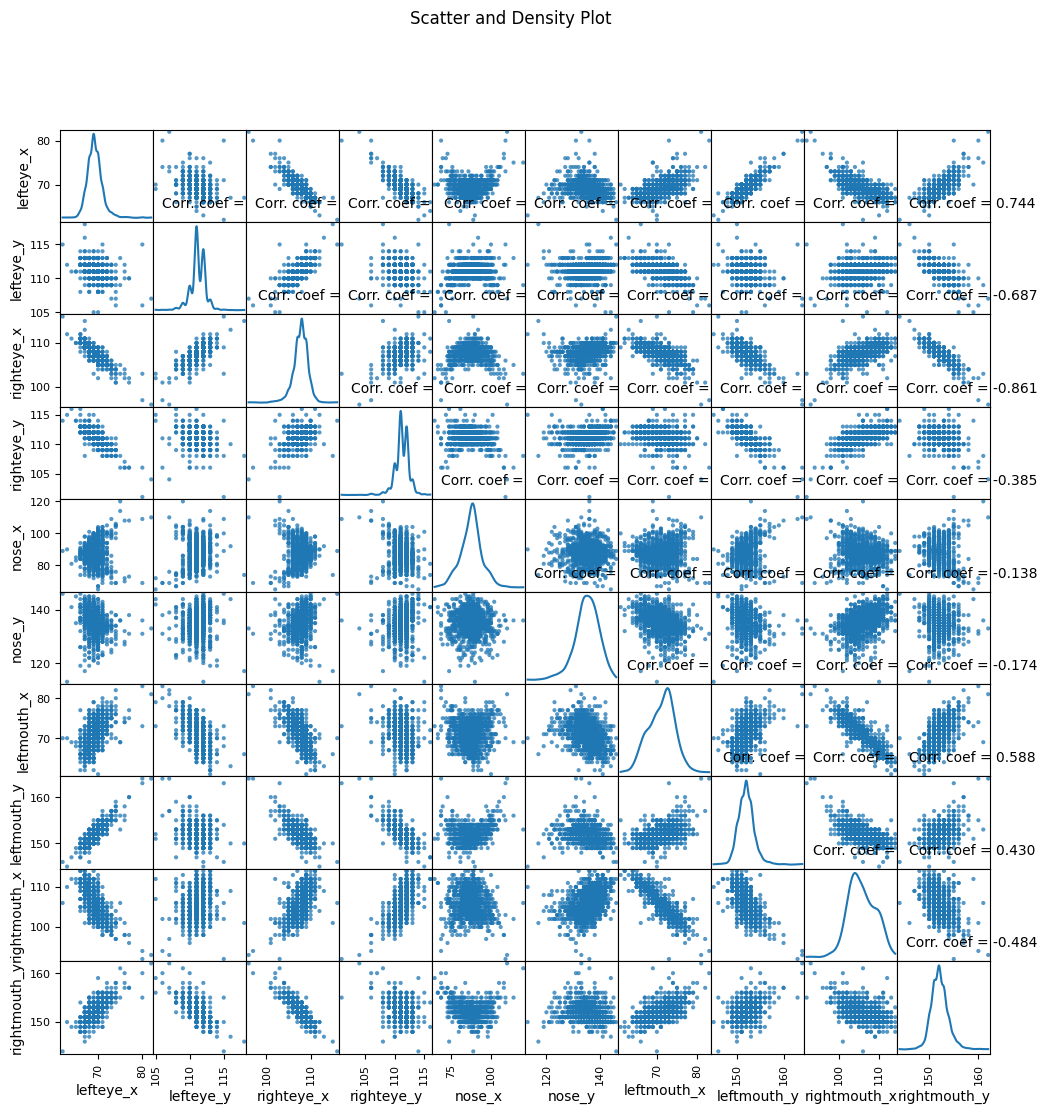

In [ ]:
plotScatterMatrix(df2, 12, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# list_eval_partition.csv has 202599 rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/content/gdrive/MyDrive/images/list_landmarks_align_celeba.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = '/content/gdrive/MyDrive/images/list_landmarks_align_celeba.csv'

nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


In [ ]:
df3.head(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [ ]:
plotPerColumnDistribution(df3, 0, 5)

<Figure size 2400x1792 with 0 Axes>

In [ ]:
!pip install gan_model

ERROR: Could not find a version that satisfies the requirement gan_model (from versions: none)
ERROR: No matching distribution found for gan_model


In [ ]:
from gan_model import gan
import numpy as np

# Create the Linear Regression model
lr = gan()

# Lists to store the iteration number and accuracy scores
iteration_numbers = []
accuracy_scores = []
loss_scores = []

# Define a tolerance level for correctness
tolerance = 0.1  # You can adjust this tolerance level as needed

for iteration in range(1, 21):  # Assuming you want to run 100 iterations
    # Split the data into new training and testing sets for each iteration
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # Fit the Linear Regression model with the training data for this iteration
    lr.fit(X_train_iter, y_train_iter)

    # Make predictions on the test data for this iteration
    y_pred = lr.predict(X_test_iter)

    # Calculate the percentage of predictions within the tolerance level
    correct_predictions = np.abs(y_test_iter - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions)
    loss=np.mean(correct_predictions)

    # Append the values to their respective lists
    iteration_numbers.append(iteration)
    accuracy_scores.append(accuracy)
    loss_scores.append(loss)

    print(f"Iteration {iteration} - Accuracy: {accuracy * 100 * 4:.2f}%")
    print(f"Iteration {iteration} - loss:{1 - accuracy}")

# You can also find the iteration number with the best accuracy
best_iteration = iteration_numbers[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"Best Accuracy achieved at Iteration {best_iteration} with Accuracy: {best_accuracy*100:.2f}%")

ModuleNotFoundError: ignored